In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot  as plt

In [2]:
import sqlite3

In [3]:
 con = sqlite3.connect(r'C:\Users\hp\Desktop\Amazon sales analysis\database.sqlite')

In [4]:
type(con)

sqlite3.Connection

In [5]:
df = pd.read_sql_query("SELECT * FROM REVIEWS" , con)

In [6]:
df.shape

(568454, 10)

In [7]:
type(df)

pandas.core.frame.DataFrame

In [8]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [9]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [10]:
#  main condition for checking invalid rows 
df['HelpfulnessNumerator']>df['HelpfulnessDenominator']

0         False
1         False
2         False
3         False
4         False
          ...  
568449    False
568450    False
568451    False
568452    False
568453    False
Length: 568454, dtype: bool

In [11]:
df[df['HelpfulnessNumerator']>df['HelpfulnessDenominator']]
# output of this cell will give us invalid rows in our dataset if they are present   

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
44736,44737,B001EQ55RW,A2V0I904FH7ABY,Ram,3,2,4,1212883200,Pure cocoa taste with crunchy almonds inside,It was almost a 'love at first bite' - the per...
64421,64422,B000MIDROQ,A161DK06JJMCYF,"J. E. Stephens ""Jeanne""",3,1,5,1224892800,Bought This for My Son at College,My son loves spaghetti so I didn't hesitate or...


In [12]:
df_valid = df[df['HelpfulnessNumerator'] <= df['HelpfulnessDenominator']]  

In [13]:
df_valid.shape  # (568454, 10) actual shape of our dataset

(568452, 10)

In [14]:
##NOW CHECKING DUPLICATE ROWS

In [15]:
## NOW FOR CHECKING DUPLICATE ROWS WE CAN CONSIDER UserId , ProfileName , Time , Text 

In [16]:
df_valid.duplicated(['UserId','ProfileName','Time','Text'])

0         False
1         False
2         False
3         False
4         False
          ...  
568449    False
568450    False
568451    False
568452    False
568453    False
Length: 568452, dtype: bool

In [17]:
df_valid[df_valid.duplicated(['UserId','ProfileName','Time','Text'])]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
29,30,B0001PB9FY,A3HDKO7OW0QNK4,Canadian Fan,1,1,5,1107820800,The Best Hot Sauce in the World,I don't know if it's the cactus or the tequila...
574,575,B000G6RYNE,A3PJZ8TU8FDQ1K,Jared Castle,2,2,5,1231718400,"One bite and you'll become a ""chippoisseur""","I'm addicted to salty and tangy flavors, so wh..."
1973,1974,B0017165OG,A2EPNS38TTLZYN,tedebear,0,0,3,1312675200,Pok Chops,The pork chops from Omaha Steaks were very tas...
2309,2310,B0001VWE0M,AQM74O8Z4FMS0,Sunshine,0,0,2,1127606400,Below standard,Too much of the white pith on this orange peel...
2323,2324,B0001VWE0C,AQM74O8Z4FMS0,Sunshine,0,0,2,1127606400,Below standard,Too much of the white pith on this orange peel...
...,...,...,...,...,...,...,...,...,...,...
568409,568410,B0018CLWM4,A2PE0AGWV6OPL7,Dark Water Mermaid,3,3,5,1309651200,Quality & affordable food,I was very pleased with the ingredient quality...
568410,568411,B0018CLWM4,A88HLWDCU57WG,R28,2,2,5,1332979200,litter box,My main reason for the five star review has to...
568411,568412,B0018CLWM4,AUX1HSY8FX55S,DAW,1,1,5,1319500800,Happy Camper,I bought this to try on two registered Maine C...
568412,568413,B0018CLWM4,AVZ2OZ479Q9E8,Ai Ling Chow,0,0,5,1336435200,Two Siberians like it!,When we brought home two 3-month-old purebred ...


In [18]:
# now #174521 is total count of duplicate rows from my 568452 rows , Now we need to drop this rows

In [19]:
 data = df_valid.drop_duplicates(subset = ['UserId','ProfileName','Time','Text'])

In [20]:
data.shape

(393931, 10)

In [21]:
#data.dtypes

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 393931 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      393931 non-null  int64 
 1   ProductId               393931 non-null  object
 2   UserId                  393931 non-null  object
 3   ProfileName             393931 non-null  object
 4   HelpfulnessNumerator    393931 non-null  int64 
 5   HelpfulnessDenominator  393931 non-null  int64 
 6   Score                   393931 non-null  int64 
 7   Time                    393931 non-null  int64 
 8   Summary                 393931 non-null  object
 9   Text                    393931 non-null  object
dtypes: int64(5), object(5)
memory usage: 33.1+ MB


In [22]:
import warnings
from warnings import filterwarnings 
filterwarnings('ignore')

In [23]:
  data['Time'] =pd.to_datetime(data['Time'] , unit = 's')

In [24]:
data['ProfileName'].nunique()

218418

In [25]:
data['UserId'].nunique()

256059

In [26]:
recommended_df =data.groupby(['UserId']).agg({'Summary':'count' , 'Text':'count', 'Score':'mean' , 'ProductId':'count'}).sort_values('ProductId' , ascending=False)

In [27]:
recommended_df.columns = ['Number_of_summaries' , 'num_text' , 'Avg _Score' , 'no.of prod purchaes']

In [28]:
recommended_df

,Number_of_summaries,num_text,Avg _Score,no.of prod purchaes
UserId,,,,
AY12DBB0U420B,329,329,4.659574,329
A3OXHLG6DIBRW8,278,278,4.546763,278
A281NPSIMI1C2R,259,259,4.787645,259
A1YUL9PCJR3JTY,214,214,4.621495,214
A1Z54EM24Y40LL,211,211,4.383886,211
...,...,...,...,...
A2E80MDB9TCNGW,1,1,3.000000,1
A2E80RT3HOR35T,1,1,5.000000,1
A2E816C5N51F6X,1,1,5.000000,1


In [29]:
recommended_df['no.of prod purchaes'][0:10]

UserId
AY12DBB0U420B     329
A3OXHLG6DIBRW8    278
A281NPSIMI1C2R    259
A1YUL9PCJR3JTY    214
A1Z54EM24Y40LL    211
A2MUGFV2TDQ47K    161
A3D6OI36USYOU1    146
AZV26LP92E6WU     129
AKMEY1BSHSDG7     119
A2GEZJHBV92EVR    118
Name: no.of prod purchaes, dtype: int64

Text(0.5, 1.0, 'Top 10 Users by Number of Products Purchased')

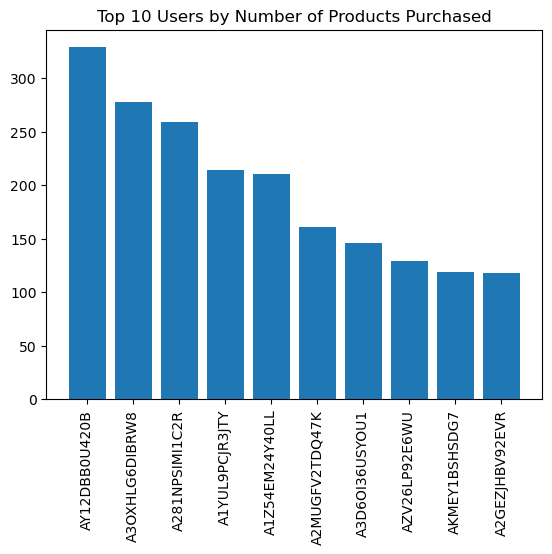

In [30]:
 plt.bar(recommended_df.index[0:10] , recommended_df['no.of prod purchaes'][0:10])
plt.xticks(rotation='vertical')
plt.title('Top 10 Users by Number of Products Purchased')

In [31]:
# which product has good number of reviews 

In [32]:
len(data['ProductId'].unique())  # this will give type of produts 

67624

In [33]:
 prod_count = data['ProductId'].value_counts().to_frame() # this will give me the count of particular paroduct is purchased

In [34]:
prod_count



,count
ProductId,
B007JFMH8M,912
B002QWP89S,630
B003B3OOPA,622
B001EO5Q64,566
B0013NUGDE,558
...,...
B002DNX4GO,1
B000FM2YU2,1
B001M1VA32,1


In [35]:
print(prod_count.columns)


Index(['count'], dtype='object')


In [36]:
prod_count['count'] > 500


ProductId
B007JFMH8M     True
B002QWP89S     True
B003B3OOPA     True
B001EO5Q64     True
B0013NUGDE     True
              ...  
B002DNX4GO    False
B000FM2YU2    False
B001M1VA32    False
B009858H6M    False
B001LR2CU2    False
Name: count, Length: 67624, dtype: bool

In [37]:
prod_count[prod_count['count'] > 500]
# this will give the productid of products who have count above then 500

,count
ProductId,
B007JFMH8M,912
B002QWP89S,630
B003B3OOPA,622
B001EO5Q64,566
B0013NUGDE,558
B000KV61FC,556
B000UBD88A,542
B000NMJWZO,542
B005K4Q37A,541


In [38]:
 freq_prod_ids = prod_count[prod_count['count'] > 500].index

In [39]:
 freq_prod_ids

Index(['B007JFMH8M', 'B002QWP89S', 'B003B3OOPA', 'B001EO5Q64', 'B0013NUGDE',
       'B000KV61FC', 'B000UBD88A', 'B000NMJWZO', 'B005K4Q37A', 'B0090X8IPM',
       'B005ZBZLT4'],
      dtype='object', name='ProductId')

In [40]:
data['ProductId'].isin( freq_prod_ids)

0         False
1         False
2         False
3         False
4         False
          ...  
568449    False
568450    False
568451    False
568452    False
568453    False
Name: ProductId, Length: 393931, dtype: bool

In [41]:
  fre_prod_df =  data[data['ProductId'].isin( freq_prod_ids)]

In [42]:
 fre_prod_df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
20982,20983,B002QWP89S,A21U4DR8M6I9QN,"K. M Merrill ""justine""",1,1,5,2011-10-18,addictive! but works for night coughing in dogs,my 12 year old sheltie has chronic brochotitis...
20983,20984,B002QWP89S,A17TDUBB4Z1PEC,jaded_green,1,1,5,2011-10-14,genuine Greenies best price,"These are genuine Greenies product, not a knoc..."
20984,20985,B002QWP89S,ABQH3WAWMSMBH,tenisbrat87,1,1,5,2011-09-28,Perfect for our little doggies,"Our dogs love Greenies, but of course, which d..."
20985,20986,B002QWP89S,AVTY5M74VA1BJ,tarotqueen,1,1,5,2011-09-24,dogs love greenies,"What can I say, dogs love greenies. They begg ..."
20986,20987,B002QWP89S,A13TNN54ZEAUB1,dcz2221,1,1,5,2011-09-23,Greenies review,This review is for a box of Greenies Lite for ...
...,...,...,...,...,...,...,...,...,...,...
563878,563879,B007JFMH8M,A366PSH7KFLRPB,TheRosySnail,0,0,5,2012-07-29,Yummy!,I loved these cookies and so did my kids. You ...
563879,563880,B007JFMH8M,A2KV6EYQPKJRR5,Kelley,0,0,5,2012-07-28,Quaker Soft Baked Cookies,This is a great tasting cookie. It is very sof...
563880,563881,B007JFMH8M,A3O7REI0OSV89M,Esme,0,0,4,2012-07-28,Delicious!,These are great for a quick snack! They are sa...
563881,563882,B007JFMH8M,A9JS5GQQ6GIQT,Syne,0,0,5,2012-07-28,yummy,I love the Quaker soft baked cookies. The rea...


Text(0.5, 1.0, 'Which product has good reviews')

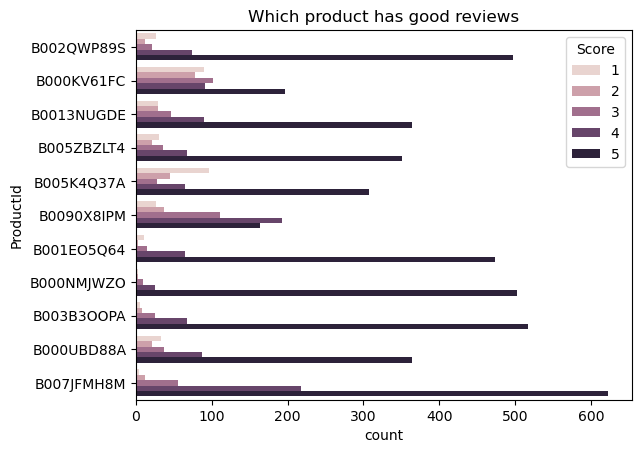

In [43]:
sns.countplot(y = 'ProductId' , data =   fre_prod_df , hue ='Score' )
plt.title("Which product has good reviews")

In [44]:
data['UserId']

0         A3SGXH7AUHU8GW
1         A1D87F6ZCVE5NK
2          ABXLMWJIXXAIN
3         A395BORC6FGVXV
4         A1UQRSCLF8GW1T
               ...      
568449    A28KG5XORO54AY
568450    A3I8AFVPEE8KI5
568451    A121AA1GQV751Z
568452     A3IBEVCTXKNOH
568453    A3LGQPJCZVL9UC
Name: UserId, Length: 393931, dtype: object

In [45]:
 x=data['UserId'].value_counts() # this will give the total number of products purchased by particular user

In [46]:
x


UserId
AY12DBB0U420B     329
A3OXHLG6DIBRW8    278
A281NPSIMI1C2R    259
A1YUL9PCJR3JTY    214
A1Z54EM24Y40LL    211
                 ... 
AAQPR1MSRXKTU       1
AGO81Z6PZSF7P       1
ALA84XWMTQBFT       1
A1G9DK8EUR36JC      1
A3LGQPJCZVL9UC      1
Name: count, Length: 256059, dtype: int64

In [47]:
data.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...


In [48]:
  data['viewer_type'] = data['UserId'].apply(lambda user : "Frequent" if x[user]>50 else "Not Frequent")

In [49]:
data.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,viewer_type
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,Not Frequent
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not Frequent
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,Not Frequent


In [50]:
 data['viewer_type']=='Not Frequent'


0         True
1         True
2         True
3         True
4         True
          ... 
568449    True
568450    True
568451    True
568452    True
568453    True
Name: viewer_type, Length: 393931, dtype: bool

In [51]:
not_freq_Df = data[data['viewer_type']=='Not Frequent']
fre_Df = data[data['viewer_type']== 'Frequent']

In [52]:
fre_Df['Score'].value_counts()

Score
5    5765
4    1979
3     897
2     368
1     349
Name: count, dtype: int64

In [53]:
fre_Df['Score'].value_counts()/len(fre_Df)*100

Score
5    61.605044
4    21.147681
3     9.585381
2     3.932464
1     3.729429
Name: count, dtype: float64

In [54]:
not_freq_Df['Score'].value_counts()/len(not_freq_Df)*100

Score
5    63.757986
4    14.071191
1     9.349850
3     7.507547
2     5.313426
Name: count, dtype: float64

<Axes: xlabel='Score'>

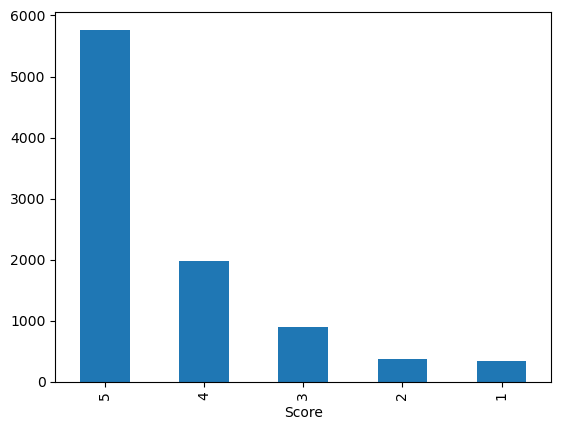

In [55]:
fre_Df['Score'].value_counts().plot( kind = 'bar')

<Axes: xlabel='Score'>

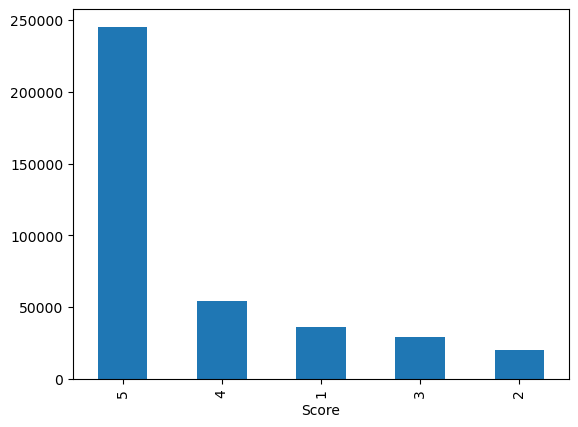

In [56]:
not_freq_Df['Score'].value_counts().plot( kind = 'bar')

In [57]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'viewer_type'],
      dtype='object')

In [58]:
data['Text']

0         I have bought several of the Vitality canned d...
1         Product arrived labeled as Jumbo Salted Peanut...
2         This is a confection that has been around a fe...
3         If you are looking for the secret ingredient i...
4         Great taffy at a great price.  There was a wid...
                                ...                        
568449    Great for sesame chicken..this is a good if no...
568450    I'm disappointed with the flavor. The chocolat...
568451    These stars are small, so you can give 10-15 o...
568452    These are the BEST treats for training and rew...
568453    I am very satisfied ,product is as advertised,...
Name: Text, Length: 393931, dtype: object

In [59]:
data[['Text' , 'UserId' , 'ProductId']]

,Text,UserId,ProductId
0,I have bought several of the Vitality canned d...,A3SGXH7AUHU8GW,B001E4KFG0
1,Product arrived labeled as Jumbo Salted Peanut...,A1D87F6ZCVE5NK,B00813GRG4
2,This is a confection that has been around a fe...,ABXLMWJIXXAIN,B000LQOCH0
3,If you are looking for the secret ingredient i...,A395BORC6FGVXV,B000UA0QIQ
4,Great taffy at a great price. There was a wid...,A1UQRSCLF8GW1T,B006K2ZZ7K
...,...,...,...
568449,Great for sesame chicken..this is a good if no...,A28KG5XORO54AY,B001EO7N10
568450,I'm disappointed with the flavor. The chocolat...,A3I8AFVPEE8KI5,B003S1WTCU
568451,"These stars are small, so you can give 10-15 o...",A121AA1GQV751Z,B004I613EE
568452,These are the BEST treats for training and rew...,A3IBEVCTXKNOH,B004I613EE


In [120]:
data['Text'][0]


'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [124]:
type(data['Text'][0])

str

In [136]:
type(data['Text'][0].split(' '))

list

In [138]:
len(data['Text'][0].split(' '))

49

In [140]:
def calculate_length(text):
    return len(text.split(' '))

In [142]:
data['Text_length'] = data['Text'].apply(calculate_length)

In [144]:
data['viewer_type'].unique()

array(['Not Frequent', 'Frequent'], dtype=object)

In [146]:
not_freq_Df = data[data['viewer_type']=='Not Frequent']
fre_Df = data[data['viewer_type']== 'Frequent'] 

In [148]:
not_freq_Df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,viewer_type,Text_length
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,Not Frequent,49
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not Frequent,31
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,Not Frequent,99
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,Not Frequent,43
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,Not Frequent,30
...,...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,2011-03-09,Will not do without,Great for sesame chicken..this is a good if no...,Not Frequent,26
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,2012-03-09,disappointed,I'm disappointed with the flavor. The chocolat...,Not Frequent,46
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,2012-02-21,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",Not Frequent,71
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,2012-03-13,Favorite Training and reward treat,These are the BEST treats for training and rew...,Not Frequent,37


(0.0, 600.0)

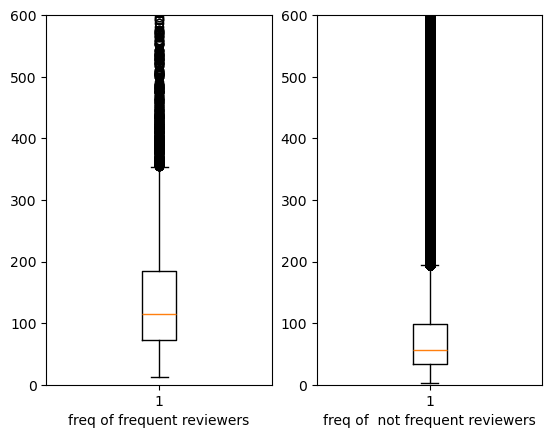

In [162]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.boxplot(fre_Df['Text_length'])
ax1.set_xlabel('freq of frequent reviewers')
ax1.set_ylim(0,600)

ax2 = fig.add_subplot(122)
ax2.boxplot(not_freq_Df['Text_length'])
ax2.set_xlabel('freq of  not frequent reviewers')
ax2.set_ylim(0,600)


In [164]:
  ## Sentient Analysis 


In [166]:
!pip install textblob

   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
    --------------------------------------- 10.2/624.3 kB ? eta -:--:--
   -------------- ------------------------- 225.3/624.3 kB 3.4 MB/s eta 0:00:01
   ---------------------------------------- 624.3/624.3 kB 4.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   -------------- ------------------------- 0.6/1.5 MB 11.8 MB/s eta 0:00:01
   -------------------------- ------------- 1.0/1.5 MB 10.6 MB/s eta 0:00:01
   ---------------------------------------  1.5/1.5 MB 10.4 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 10.6 MB/s eta 0:00:00
  Attempting uninstall: nltk
    Found existing installation: nltk 3.8.1
    Uninstalling nltk-3.8.1:
      Successfully uninstalled nltk-3.8.1


In [170]:
from textblob import TextBlob

In [176]:
data['Summary']
data['Summary'][0]


'Good Quality Dog Food'

In [178]:
TextBlob('Good Quality Dog Food').sentiment.polarity

0.7

In [180]:
sample = data[0:50000]

In [188]:
polarity = []
for text in sample['Summary']:
    try:
       polarity.append(TextBlob(text).sentiment.polarity)
    except:
        polarity.append(0)

In [190]:
len(polarity)

50000

In [192]:
sample['polarity'] = polarity

In [196]:
sample.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,viewer_type,Text_length,polarity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,Not Frequent,49,0.7
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not Frequent,31,0.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,Not Frequent,99,0.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,Not Frequent,43,0.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,Not Frequent,30,0.8


In [200]:
 sample_negative = sample[sample['polarity']<0]
sample_positive = sample[sample['polarity']>0]

In [210]:
sample_negative['Summary']

16                  poor taste
26             Nasty No flavor
57       How can you go wrong!
61            pretty expensive
62              stale product.
                 ...          
54185                 Horrible
54186            Horrible idea
54191                    STALE
54212             Disappointed
54251      Just not very good!
Name: Summary, Length: 4658, dtype: object

In [212]:
from collections import Counter

In [214]:
Counter(sample_negative['Summary'])

Counter({'Disappointed': 44,
         'Disappointing': 32,
         'Bland': 18,
         'Awful': 17,
         'Not what I expected': 17,
         'Terrible': 15,
         'Horrible': 15,
         'disappointed': 15,
         'Disgusting': 12,
         'not good': 11,
         "Don't waste your money": 11,
         'Not good': 10,
         'Very Disappointed': 10,
         'disappointing': 9,
         'Not worth the money': 9,
         'Not Good': 8,
         'Not very good': 8,
         'Not impressed': 8,
         'Nasty': 8,
         'Stale': 7,
         'Bitter': 6,
         'Waste of money': 6,
         'Hard to find': 6,
         'Mediocre': 6,
         'Weak': 6,
         'AWFUL': 5,
         'Addicted': 5,
         'awful': 5,
         'Poor Quality': 5,
         'Not worth it': 5,
         'Not great': 5,
         'Bad aftertaste': 5,
         'Bad': 4,
         'Disappointed!': 4,
         'too expensive': 4,
         'Tasteless': 4,
         'Terrible!': 4,
         'Not to

In [216]:
Counter(sample_negative['Summary']).most_common(10)

[('Disappointed', 44),
 ('Disappointing', 32),
 ('Bland', 18),
 ('Awful', 17),
 ('Not what I expected', 17),
 ('Terrible', 15),
 ('Horrible', 15),
 ('disappointed', 15),
 ('Disgusting', 12),
 ('not good', 11)]

In [218]:
Counter(sample_positive['Summary']).most_common(10)

[('Delicious!', 208),
 ('Delicious', 204),
 ('Great product', 100),
 ('Excellent', 85),
 ('Love it!', 81),
 ('Great', 81),
 ('Great Product', 77),
 ('Great!', 70),
 ('Good stuff', 51),
 ('Awesome', 50)]

In [228]:
def categorize_sentiment(polarity):
    if polarity > 0.2:
        return "Positive"
    elif polarity < -0.2:
        return "Negative"
    else:
        return "Neutral"

sample["Sentiment_Category"] = sample["polarity"].apply(categorize_sentiment)
print(sample[["polarity", "Sentiment_Category"]].head())  # Verify the new column



   polarity Sentiment_Category
0       0.7           Positive
1       0.0            Neutral
2       0.0            Neutral
3       0.0            Neutral
4       0.8           Positive


In [226]:
print(sample.columns)  # Check all column names


Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'viewer_type', 'Text_length', 'polarity'],
      dtype='object')


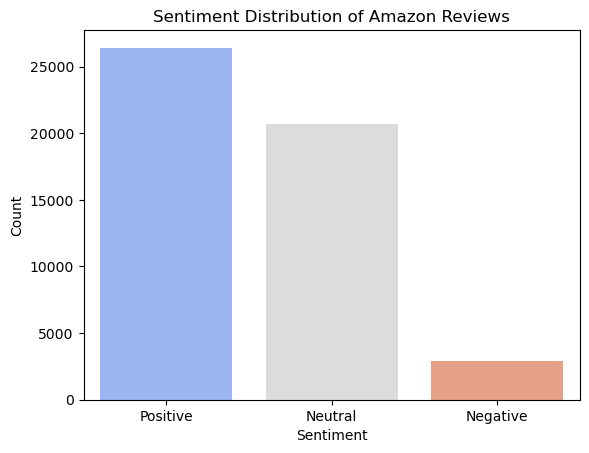

In [230]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Sentiment_Category", data=sample, palette="coolwarm")
plt.title("Sentiment Distribution of Amazon Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()
